In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import timestring
%matplotlib inline

In [3]:
#NIBRS - Incident 
#this is a huge 6GB tsv file 
# it is only for 2015
nibrs = pd.read_csv("/Users/catherineordun/Documents/Hackathon/DHHS/ICPSR_36851_incident/DS0001/36851-0001-Data.tsv", sep='\t')

/Users/catherineordun/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,73,230,231,232,350,351,352,389) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#extract only the variables we need related to drugs
nibrscodes= pd.read_csv("/Users/catherineordun/Documents/Hackathon/DHHS/nbirs_codes.csv")

In [5]:
#flatten to remove it as a list of lists
nibrslist = nibrscodes.values.T.flatten()

Make a copy 

Out of 809 variables, the following are what we want to tease out: <br>

<li>ORI originating agency identifier
<li>STATE
<li>INCNUM
<li>INCDATE
<li>BH008 STATE ABBREVIATION
<li>BH007 CITY NAME
<li>BH010 COUNTRY DIVISION
<li>BH011 COUNTRY REGION
<li>BH013 CORE CITY
<li>BH016 JUDICIAL DISTRICT
<li>BH019 CURRENT POPULATION 1
<li>BH020 UCR COUNTY CODE 1
<li>BH021 MSA CODE 1
<li>BH022 LAST POPULATION 1
<li>BH041 MASTER FILE YEAR
<li>BH054 FIPS COUNTY 1
<li>BH055 FIPS COUNTY 2
<li>BH056 FIPS COUNTY 3
<li>BH057 FIPS COUNTY 4
<li>BH058 FIPS COUNTY 5
<li>V1007 INCIDENT DATE HOUR
<li>V1008 TOTAL OFFENSE SEGMENTS
<li>V1009 TOTAL VICTIM SEGMENTS
<li>V1010 TOTAL OFFENDER SEGMENTS
<li>V1011 TOTAL ARRESTEE SEGMENTS
<li>V20061 - UCR OFFENSE CODE - 1 
<li>V20062 - UCR OFFENSE CODE - 2
<li>V20063 - UCR OFFENSE CODE - 3
<li>V30121 SUSPECTED DRUG TYPE 1 - 1
<li>V30122 SUSPECTED DRUG TYPE 1 - 2
<li>V30123 SUSPECTED DRUG TYPE 1 -3 
<li>V30131 ESTIMATED QUANTITY 1-1
<li>V30132 ESTIMATED QUANTITY 1-2
<li>V30133 ESTIMATED QUANTITY 1 -3
<li>V30141 ESTIMATED QUANTITY - FRACTIONAL THOUSANDTHS 1 - 1
<li>V30142 ESTIMATED QUANTITY - FRACTIONAL THOUSANDTHS 1 - 2
<li>V30143 ESTIMATED QUANTITY - FRACTIONAL THOUSANDTHS 1 - 3
<li>V30151 - TYPE MEASUREMENT 1 - 1
<li>V20081 - OFFENDER(S) SUSPECTED OF USING 1 - 1
<li>V20082 - OFFENDER(S) SUSPECTED OF USING 1-2
<li>V20083 - OFFENDER(S)SUSPECTED OF USING 1 - 3
<li>V20111 - LOCATION TYPE 1 
<li>V20112 - LOCATION TYPE 2
<li>V20113 - LOCATION TYPE 3
<li>V20171 - TYPE WEAPON/FORCE INVOLVED 1 - 1
<li>V20172 - TYPE WEAPON/FORCE INVOLVED 1 - 2
<li>V20173 - TYPE WEAPON/FORCE INVOLVED 1 -3
<li>V30061 - TYPE PROPERTY LOSS/ETC - 1
<li>V30062 - TYPE PROPERTY LOSS/ETC - 2
<li>V30063 - TYPE PROPERTY LOSS / ETC - 3
<li>V30071 - PROPERTY DESCRIPTION - 1
<li>V30072 - PROPERTY DESCRIPTION - 2
<li>V30073 - PROPERTY DESCRIPTION - 3
<li>V30081 - VALUE OF PROPERTY - 1
<li>V30082 - VALUE OF PROPERTY - 2
<li>V30083 - VALUE OF PROPERTY - 3

<li>--these below are not in the incident-level file---

<li>V5006 OFFENDER SEQUENCE NUMBER - 1
<li>V5008 AGE OF OFFENDER - 1
<li>V5008 SEX OF OFFENDER - 1
<li>V5009 RACE OF OFFENDER - 1
<li>V5011 ETHNICITY OF OFFENDER - 1
<li>V6006 ARRESTEE SEQUENCE NUMBER - 1
<li>V6009 ARREST DATE - 1
<li>V6009 TYPE OF ARREST - 1
<li>V6014 AGE OF ARRESTEE - 1
<li>V6015 SEX OF ARRESTEE - 1
<li>V6016 RACE OF ARRESTEE - 1
<li>V6017 ETHNICITY OF ARRESTEE - 1
<li>V60081 ARREST DATE - 1
<li>ALLOFNS - ALL OFFENSE CODES FOR THE INCIDENT

<b>For simplicity, I only took the '1' first incident variable.  As you can see, there can be many incidents 1, 2, 3, etc. </b>


In [8]:
nibrs_bu = nibrs.copy()

nibrs_bu.columns.intersection(nibrslist)
nibrs_reduced = nibrs_bu[nibrs_bu.columns.intersection(nibrslist)]

In [9]:
nibrs_drugs = [4, 6, 7, 8, 14, 15]


In [10]:
len(nibrs_reduced)

4986608

In [11]:
#there were 4986608 records, when only looking at drugs of interest it goes down to 70133
nibrs_reduced_drugs = nibrs_reduced.loc[nibrs_reduced['V30121'].isin(nibrs_drugs)]
nibrs_stats = pd.pivot_table(nibrs_reduced_drugs,index=["BH008", "BH041","V30121"], values=["INCNUM"], 
                             aggfunc={"INCNUM": lambda x: len(x.unique())})

nibrs_stats.reset_index(inplace=True)


In [12]:
len(nibrs_reduced_drugs)

70133

In [13]:
nibrs_stats.head()

,BH008,BH041,V30121,INCNUM
0,AL,2015,4,16
1,AL,2015,6,1
2,AL,2015,8,3
3,AL,2015,15,1
4,AR,2015,4,89


Pair Grid to explore how States Compare with the number of criminal incidents involving nibrs_drugs of interest

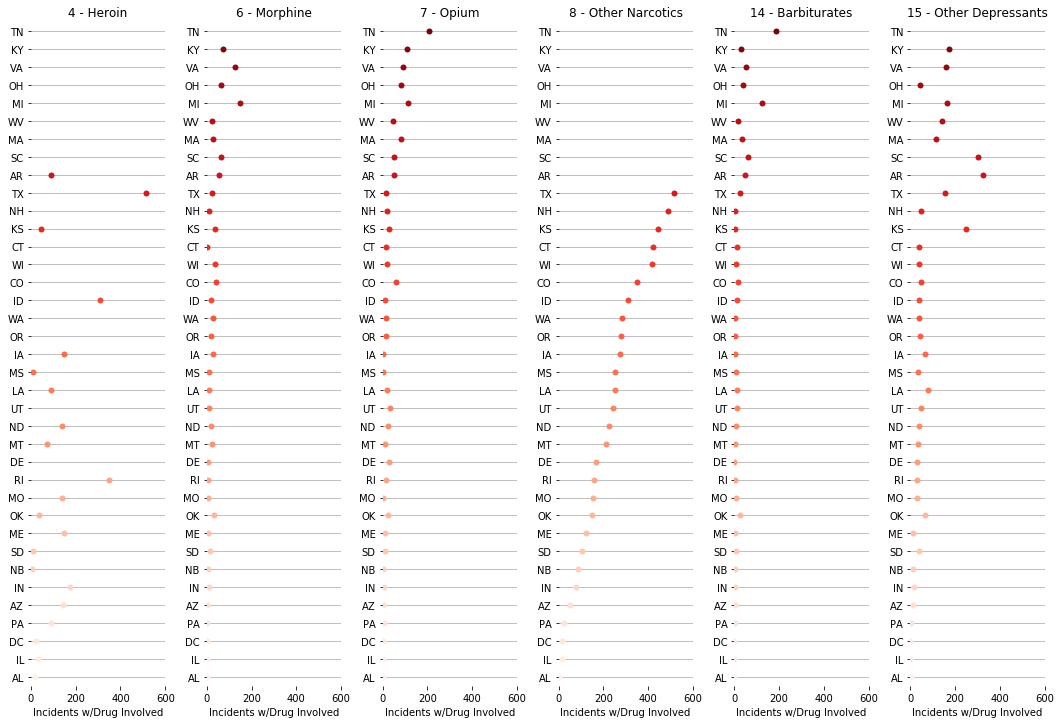

In [14]:
#first, make a pivot table called nibrs_drugs_df

nibrs_drugs_df = pd.pivot_table(nibrs_stats,index=["BH008"],values=["INCNUM"],
               columns=["V30121"],aggfunc=[np.sum])
nibrs_drugs_df.fillna(value=0, inplace=True)
nibrs_drugs_df.columns = nibrs_drugs_df.columns.droplevel()
nibrs_drugs_df.columns = nibrs_drugs_df.columns.droplevel()
nibrs_drugs_df.reset_index(inplace=True)

# Make the PairGrid
g = sns.PairGrid(nibrs_drugs_df.sort_values([8], ascending=False),
                 x_vars=nibrs_drugs_df.columns[1:7], 
                 y_vars=["BH008"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=6, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 600), xlabel="Incidents w/Drug Involved", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["4 - Heroin", "6 - Morphine", "7 - Opium",
          "8 - Other Narcotics", "14 - Barbiturates",
          "15 - Other Depressants"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [15]:
#Note: not all 51 states are in the NIBRS dataset - checked both reduced and full set (S3) 
nibrs_reduced['BH008'].unique()
nibrs_reduced['BH008'].nunique()
nibrs_reduced_drugs['BH008'].unique()
nibrs_reduced_drugs['BH008'].nunique()

37

<b>This is the dataframe we will use in the hackathon to measure time of incident by drug by location and by amount of drug</b>

In [16]:
#Another pivot table with dates and important variables summed up by incident and drug of interest
nibrs_pivot = pd.pivot_table(nibrs_reduced_drugs,index=["BH041","BH008","BH011","BH021",
                                                        "BH054","INCDATE","V20061","V30121","V30131","V30151","V30141",
                                                        "V20081", 'ALLOFNS'], values=["INCNUM"], aggfunc={"INCNUM": lambda x: len(x.unique())})
nibrs_pivot.reset_index(inplace=True)

#convert INCDATE into datetime
nibrs_pivot['INCDATE'] = nibrs_pivot['INCDATE'].apply(str)
nibrs_pivot['incident_date'] = map(lambda x: x[0:4] + "-" + x[4:6] + "-" + x[6:], nibrs_pivot['INCDATE'])
nibrs_pivot['incident_date'] = pd.to_datetime(nibrs_pivot['incident_date'], format='%Y-%m-%d')

nibrs_pivot.drop('INCDATE', axis=1, inplace=True)


In [17]:
nibrs_pivot.head()

,BH041,BH008,BH011,BH021,BH054,V20061,V30121,V30131,V30151,V30141,V20081,ALLOFNS,INCNUM,incident_date
0,2015,AL,3,98,73,351,4,1,-7,0,3,351 352,1,2015-01-15
1,2015,AL,3,98,73,351,15,25,9,0,3,351,1,2015-01-19
2,2015,AL,3,98,73,351,4,1,-7,0,3,351 352,1,2015-02-06
3,2015,AL,3,98,73,351,4,1,-7,0,3,351,1,2015-02-21
4,2015,AL,3,98,73,351,4,1,-7,0,3,351 352 520,1,2015-03-04


In [18]:
nibrs_pivot.dtypes

BH041                     int64
BH008                    object
BH011                     int64
BH021                     int64
BH054                     int64
V20061                    int64
V30121                    int64
V30131                    int64
V30151                    int64
V30141                    int64
V20081                    int64
ALLOFNS                  object
INCNUM                    int64
incident_date    datetime64[ns]
dtype: object

Here we want to plot a few key parameters:<br>
<li> UCR Offense Code that is 351 (Drug/Narcotic Violations) or 352 (Drug Equipment Violations) = V20061
<li> In this case, choosing Texas based on it being a large enough state to work with for the hackathon and Pair Grid showing a lot of drug incidents = BH008 - TX
<li>V30121 = Opium or V30121 = Other Narcotic

In [19]:
#====PLOTS by incident_date====
#V20061 = 351 DRUG/NARCOTIC VIOLATIONS or 352 DRUG EQUIPMENT VIOLATIONS
nibrs_texas = nibrs_pivot.loc[
        ((nibrs_pivot["V20061"] == 351) | (nibrs_pivot["V20061"] == 352)) &
        (nibrs_pivot["BH008"]== 'TX') &
        ((nibrs_pivot["V30121"] == 7) | (nibrs_pivot["V30121"] ==8))]

In [20]:
nibrs_texas.head()

,BH041,BH008,BH011,BH021,BH054,V20061,V30121,V30131,V30151,V30141,V20081,ALLOFNS,INCNUM,incident_date
52258,2015,TX,3,-6,43,351,8,1,1,0,3,351,1,2015-12-23
52259,2015,TX,3,-6,43,351,8,0,1,130,3,351,1,2015-12-31
52260,2015,TX,3,-6,43,351,8,4,1,80,3,351,1,2015-12-31
52261,2015,TX,3,-6,53,351,8,2,9,0,3,351,1,2015-07-28
52262,2015,TX,3,-6,53,351,8,1,9,0,3,351,1,2015-07-31


<b>Plot 1 - Histogram of unit of measure</b> shows majority of drugs for opium and other narcotics in Texas in 2015 are in grams (code:1) followed by 'dosage per unit' (code: 9)

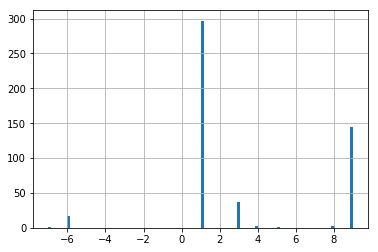

In [21]:
#histogram of weight measurements in Texas 2015 - shows majority are grams followed by dosage unit/items
nibrs_texas['V30151'].hist(bins=100)

<b>Plot 2 - Scatter plot showing distribution of quantity by measurement type</b>

We haven't converted, but will use an approximation that the majority of records are in grams the spike is a nearly 1750 grams.

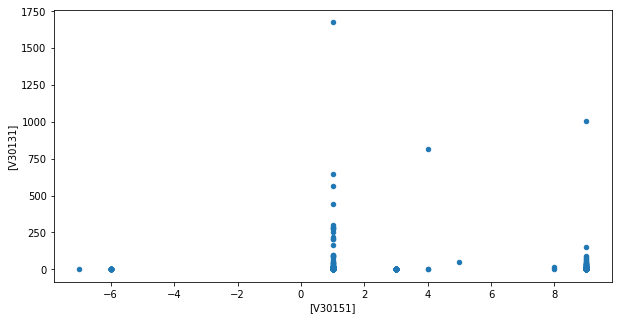

In [22]:
nibrs_texas.plot(x=['V30151'], y =['V30131'], kind='scatter', figsize=(10,5))

<b>Plot 3 - shows full range of quantity over incident time in Texas</b>

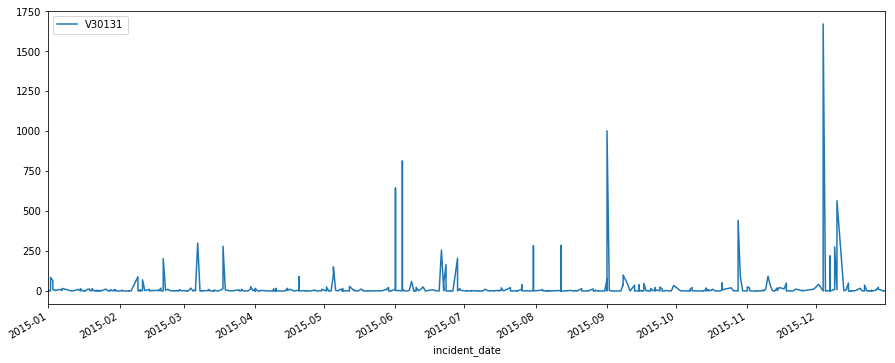

In [23]:
nibrs_texas.plot(x='incident_date', y = 'V30131', figsize=(15,6))

<b>Plot 4 -  Shows varying y-axes limits to demonstrate the amount of activity, which you don't see without rescaling</b>

(0, 500)

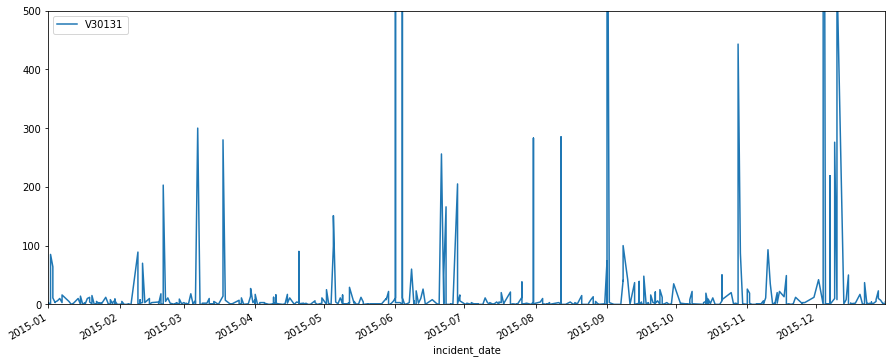

In [24]:
#this one shows the activity of just up to 500 g
axes = nibrs_texas.plot(x='incident_date', y = 'V30131', figsize=(15,6))
axes.set_ylim([0,500])

(0, 200)

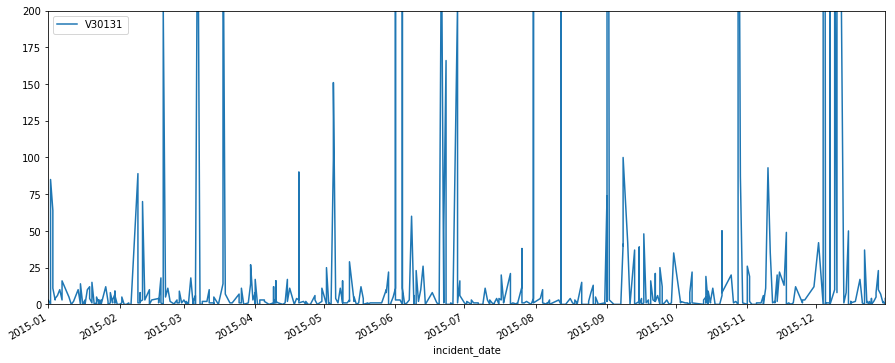

In [25]:
#this one shows the activity of just up to 200 g
axes = nibrs_texas.plot(x='incident_date', y = 'V30131', figsize=(15,6))
axes.set_ylim([0,200])


(0, 20)

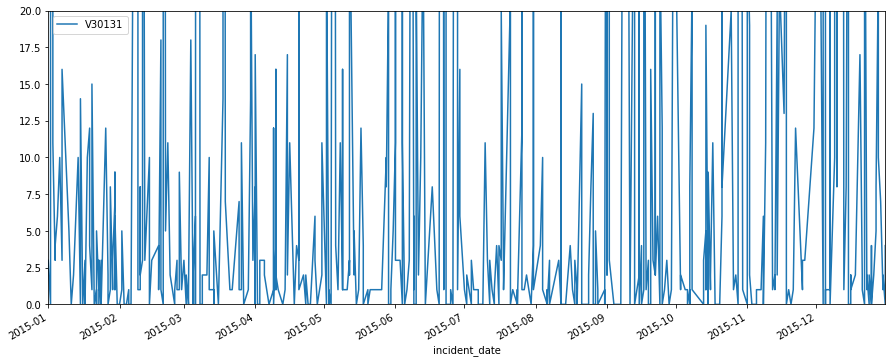

In [26]:
#this one shows the activity of just up to 20 g
axes = nibrs_texas.plot(x='incident_date', y = 'V30131', figsize=(15,6))
axes.set_ylim([0,20])


Next Step:  Time series prediction for 2016